In [1]:
from scipy.special import softmax
import pandas as pd
from IPython.display import Image
import numpy as np
from datasets import load_dataset
import torch

from openprompt import PromptDataLoader, PromptForClassification
from openprompt.data_utils import InputExample
from openprompt.plms import load_plm
from openprompt.prompts import ManualTemplate, ManualVerbalizer, ManualTemplate

g:\python\lib\site-packages\transformers\generation_utils.py:27: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  FutureWarning,


In [2]:
IMAGE_PATH = '../data/images/'

In [3]:
# Dependencies
plm, tokenizer, model_config, WrapperClass = load_plm("gpt2","gpt2")
mappings = pd.read_csv('../data/pokemon_mapping.csv')
name_to_label_dict = mappings[["name","index"]].set_index('index').to_dict()["name"]
pokemon_descriptions = load_dataset('../data/dataset/', delimiter=';')
NUM_CLASSES = np.unique(pokemon_descriptions['train']['labels'])

Using pad_token, but it is not set yet.
Using custom data configuration dataset-294e9b13f49dafc6
Found cached dataset csv (C:/Users/fst/.cache/huggingface/datasets/csv/dataset-294e9b13f49dafc6/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Required for inference
promptTemplate = ManualTemplate(
    text = '{"placeholder":"text_a"} the pokemon is {"mask"}',
    tokenizer = tokenizer,
)

promptVerbalizer = ManualVerbalizer(
    classes = NUM_CLASSES,
    label_words = name_to_label_dict,
    tokenizer = tokenizer,
)

promptLoadedModel = PromptForClassification(
    template = promptTemplate,
    plm = plm,
    verbalizer = promptVerbalizer,
    freeze_plm= True
)

promptLoadedModel.load_state_dict(state_dict=torch.load("checkp_copy/gpt2_trained_model.cp"))

<All keys matched successfully>

In [5]:
def predict(inference_text):
    inference_input = InputExample(text_a = inference_text)

    inference_dataloader = PromptDataLoader(dataset=[inference_input], template=promptTemplate, tokenizer=tokenizer,
        tokenizer_wrapper_class=WrapperClass, max_seq_length=250, decoder_max_length=3,
        batch_size=1,shuffle=False, teacher_forcing=False, predict_eos_token=False,
        truncate_method="head")

    for index, inputs in enumerate(inference_dataloader):
        logits = promptLoadedModel(inputs)

    predicted_class = torch.argmax(logits, dim=-1)

    print(f"Input: {inference_text}")
    print(f"Result: The pokemon is: {name_to_label_dict[int(predicted_class)]}")
    
    img = mappings.loc[mappings["index"]==int(predicted_class)]["path"].values[0]
    display(Image(filename=IMAGE_PATH + img, width = 300, height = 300))

tokenizing: 1it [00:00, 499.80it/s]


Input: Walking stone monster with a huge body.
Result: The pokemon is: Wartortle


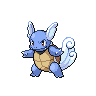

tokenizing: 1it [00:00, 1000.07it/s]


Input: Walking stone monster with a huge body. It hates water.
Result: The pokemon is: Wartortle


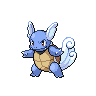

tokenizing: 1it [00:00, 498.79it/s]


Input: Walking stone monster with a huge body. It hates water. Favorit attack is earthshake
Result: The pokemon is: Onix


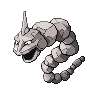

tokenizing: 1it [00:00, 500.10it/s]


Input: Insect with sharp claws only found in the safari zone
Result: The pokemon is: Sandslash


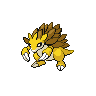

tokenizing: 1it [00:00, 1002.22it/s]


Input: only wakes up to eat
Result: The pokemon is: Oddish


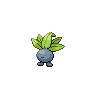

tokenizing: 1it [00:00, 284.13it/s]


Input: A rock pokemon which looks like a stone snake
Result: The pokemon is: Geodude


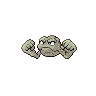

tokenizing: 1it [00:00, 999.12it/s]


Input: A stone like snake
Result: The pokemon is: Onix


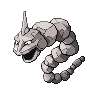

tokenizing: 1it [00:00, 333.23it/s]


Input: The pokemon has a small Flower on the head and likes to sing. During the night it is sleeping.
Result: The pokemon is: Jigglypuff


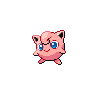

tokenizing: 1it [00:00, 483.44it/s]


Input: Many believe that all other Pokémon are descendants of this one
Result: The pokemon is: Mewtwo


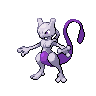

tokenizing: 1it [00:00, 481.27it/s]


Input: It was the result of various experiments of team rocket
Result: The pokemon is: Mewtwo


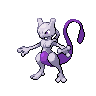

tokenizing: 1it [00:00, 499.80it/s]


Input: A snake dragon like pokemon with a long tail. It is an higher evolution and is really strong. One of the top five is using this pokemon
Result: The pokemon is: Gyarados


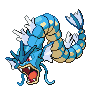

tokenizing: 1it [00:00, 499.38it/s]


Input: It is yellow and it's cheeks have red circles. It has long ears and likes thunder. Ash is his best friend
Result: The pokemon is: Pikachu


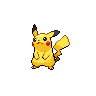

tokenizing: 1it [00:00, 1000.79it/s]


Input: A psychic pokemon with spoons
Result: The pokemon is: Kadabra


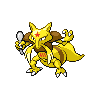

tokenizing: 1it [00:00, 1000.55it/s]


Input: Red legendary dragon with fire
Result: The pokemon is: Moltres


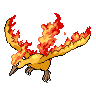

In [6]:
inference_text = [
    "Walking stone monster with a huge body.",
    "Walking stone monster with a huge body. It hates water.",
    "Walking stone monster with a huge body. It hates water. Favorit attack is earthshake",
    "Insect with sharp claws only found in the safari zone",
    "only wakes up to eat",
    "A rock pokemon which looks like a stone snake",
    "A stone like snake",
    "The pokemon has a small Flower on the head and likes to sing. During the night it is sleeping.",
    "Many believe that all other Pokémon are descendants of this one",
    "It was the result of various experiments of team rocket",
    "A snake dragon like pokemon with a long tail. It is an higher evolution and is really strong. One of the top five is using this pokemon",
    "It is yellow and it's cheeks have red circles. It has long ears and likes thunder. Ash is his best friend",
    "A psychic pokemon with spoons",
    "Red legendary dragon with fire",
]

for text in inference_text:
    predict(text)

In [1]:
from IPython.display import clear_output

clear_output()